# <center>Assessment CLO-3: Tugas Pemrograman Learning</center>

<b>Topik</b>
Klasifikasi pada Whole sale menggunakan KNN
//"Implementasi Klasifikasi Penjualan Grosir Menggunakan Metode K-Nearest Neighbors (KNN)"//

<b>Kelompok: 8 </b>

Anggota:
1. Luna Aulia - 1301223025
2. Adinda Laras Sri Rahtami - 1301223253
3. Yulia Adinda Yuda - 1301223415

#### Pendahuluan


Analisis data Wholesale Customers merupakan langkah penting untuk memahami pola pembelian dan meningkatkan strategi pemasaran. Dataset Wholesale Customers yang berisi informasi tentang 7 fitur (Channel, Fresh, Milk, Grocery, Frozen, Detergents_Paper, dan Delicassen) dan satu target yaitu Region yang dapat dimanfaatkan untuk membangun model pembelajaran mesin yang mampu memprediksi wilayah geografis yang paling menguntungkan bagi penjualan produk-produk tertentu. Kemudian akan dilakukan split data menjadi data train dan data set terhadap ketujuh fitur dan satu target tersebut.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# import dataset
df = pd.read_csv('/content/Untitled spreadsheet - Wholesale-customers-data.csv')

df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [ ]:
# mengeprint keseluruhan data
print(df)

     Channel  Region  Fresh   Milk  Grocery  Frozen  Detergents_Paper  \
0          2       3  12669   9656     7561     214              2674   
1          2       3   7057   9810     9568    1762              3293   
2          2       3   6353   8808     7684    2405              3516   
3          1       3  13265   1196     4221    6404               507   
4          2       3  22615   5410     7198    3915              1777   
..       ...     ...    ...    ...      ...     ...               ...   
435        1       3  29703  12051    16027   13135               182   
436        1       3  39228   1431      764    4510                93   
437        2       3  14531  15488    30243     437             14841   
438        1       3  10290   1981     2232    1038               168   
439        1       3   2787   1698     2510      65               477   

     Delicassen  
0          1338  
1          1776  
2          7844  
3          1788  
4          5185  
..          ...

In [ ]:
# melihat informasi terhadap data yang ada
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [ ]:
# melihat detail keseluruhan data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Channel,440.0,1.322727,0.468052,1.0,1.00,1.0,2.00,2.0
Region,440.0,2.543182,0.774272,1.0,2.00,3.0,3.00,3.0
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0
Delicassen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0


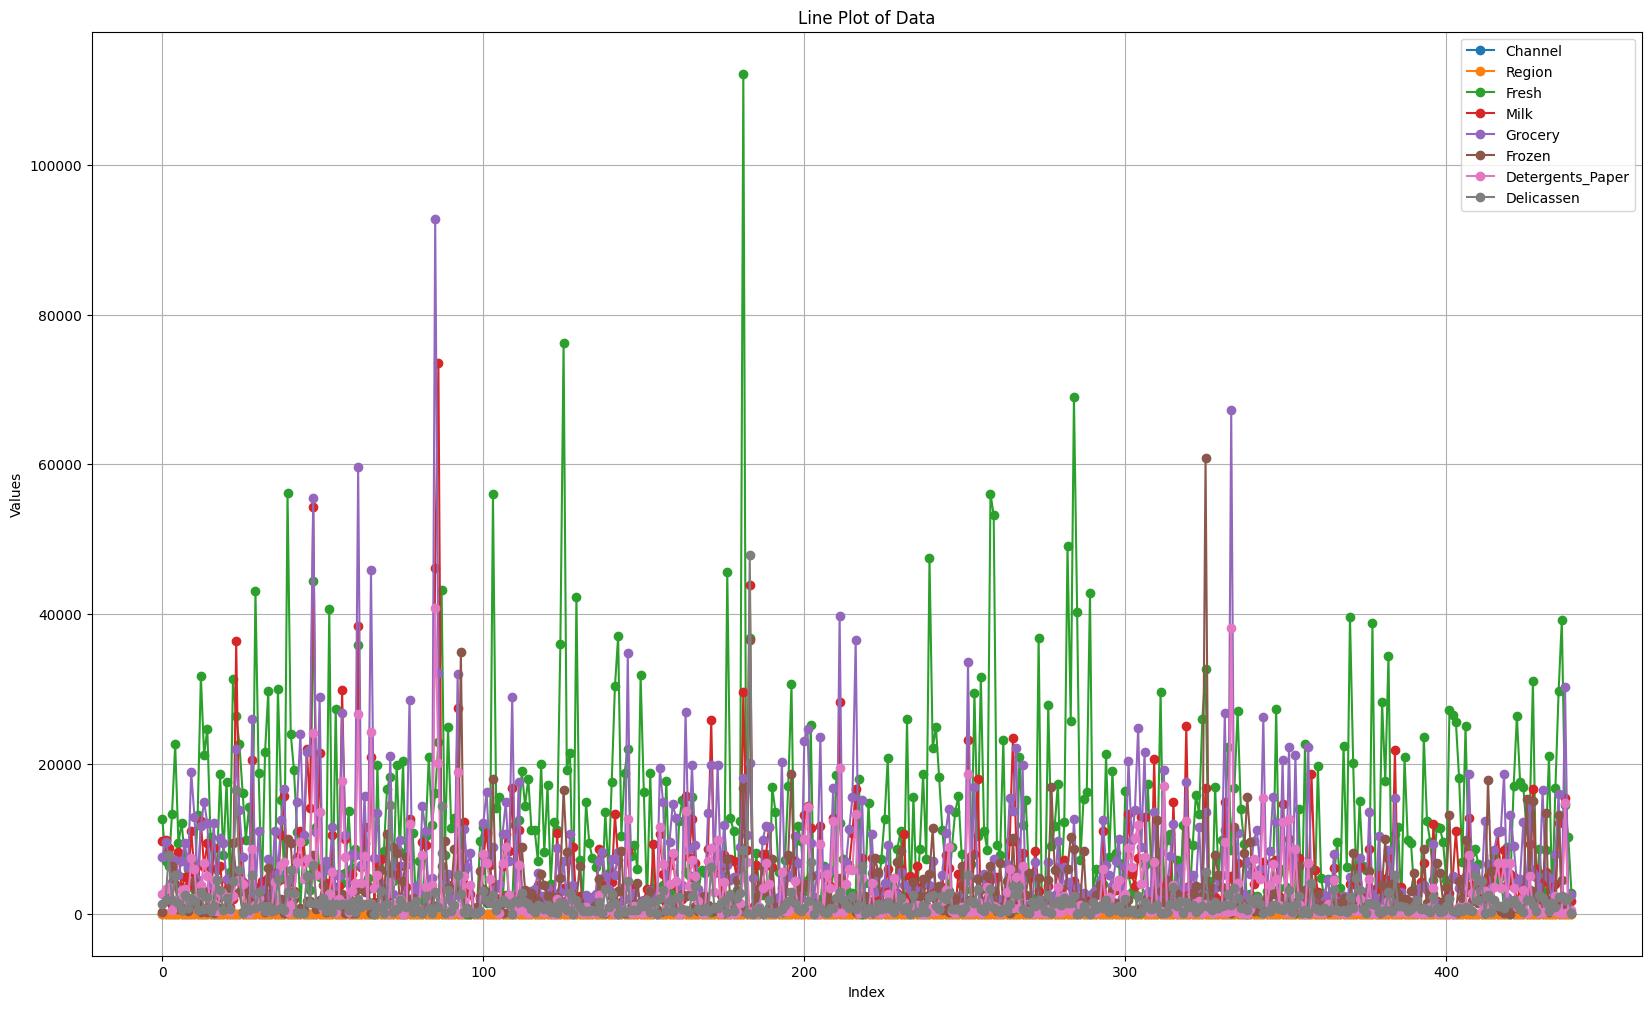

In [ ]:
#visualisasi data menggunakan line plot
plt.figure(figsize=(20, 12))
for column in df.columns:
    plt.plot(df.index, df[column], marker='o', label=column)

plt.title('Line Plot of Data')
plt.xlabel('Index')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

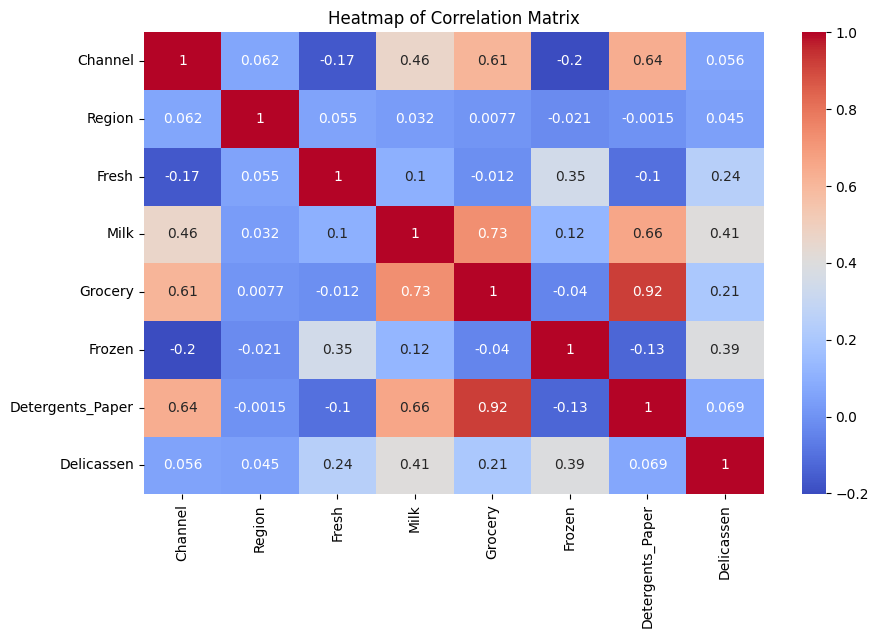

In [ ]:
#visualisasi data menggunakan heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap of Correlation Matrix')
plt.show()

**FASE PREPROCESSING**

In [ ]:
# memastikan data yang ada tidak memiliki data kosong dengan menghapus null
df.dropna()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


Kami akan melakukan pengecekan terhadap data kosong untuk memastikan kualitas dan integritas data sebelum melakukan analisis atau membangun model machine learning.

In [ ]:
# cek data kosong

df.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

Kami akan melakukan pengecekan terhadap unique value untuk memahami pendistribusian data

In [ ]:
#menghitung jumlah nilai unik untuk setiap kolom dalam DataFrame
df.apply(lambda x: len(x.unique()))

Channel               2
Region                3
Fresh               433
Milk                421
Grocery             430
Frozen              426
Detergents_Paper    417
Delicassen          403
dtype: int64

**FASE SPLIT DATA**

Dalam fase ini kami akan memisahkan antara fitur dan target

In [ ]:
# X merupakan variabel yang berisi ketujuh fitur
X = df.drop(columns=['Region'])

# Y merupakan variabel yang berisi target
y = df['Region']

In [ ]:
# membagi data menjadi data train dan data test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# menampilkan bentuk dari data train dan data test

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (352, 7)
X_test shape: (88, 7)
y_train shape: (352,)
y_test shape: (88,)


In [ ]:
print(X_train)

     Channel  Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicassen
266        2    572   9763    22182    2221              4882        2563
294        1  21273   2013     6550     909               811        1854
31         1   2612   4339     3133    2088               820         985
84         2  11867   3327     4814    1178              3837         120
301        2   5283  13316    20399    1809              8752         172
..       ...    ...    ...      ...     ...               ...         ...
106        2   1454   6337    10704     133              6830        1831
270        1   4720   1032      975    5500               197          56
348        1   3428   2380     2028    1341              1184         665
435        1  29703  12051    16027   13135               182        2204
102        2   2932   6459     7677    2561              4573        1386

[352 rows x 7 columns]


In [ ]:
print(y_train)

266    1
294    2
31     3
84     3
301    2
      ..
106    3
270    1
348    3
435    3
102    3
Name: Region, Length: 352, dtype: int64


**SCALLING DATA**

Metode ini digunakan untuk jarak antar data tidak terlalu jauh

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
print(X_train)

[[ 1.39927953 -0.96710439  0.504414   ... -0.1498063   0.36677071
   0.32461299]
 [-0.71465349  0.86110005 -0.50494754 ... -0.42607655 -0.43895466
   0.0927889 ]
 [-0.71465349 -0.78694223 -0.20200884 ... -0.17781236 -0.4371734
  -0.19135092]
 ...
 [-0.71465349 -0.71487736 -0.45714939 ... -0.33510952 -0.36513114
  -0.29598239]
 [-0.71465349  1.60559373  0.80240357 ...  2.14837466 -0.56344527
   0.20722957]
 [ 1.39927953 -0.75868149  0.07410038 ... -0.07821188  0.30561396
  -0.06023462]]


In [ ]:
print(X_test)

[[-7.14653492e-01 -4.95768366e-01  2.29704008e+00  5.51427346e-01
   1.52087060e+00 -4.35194212e-01  6.75455373e-01]
 [-7.14653492e-01 -6.68234353e-02 -6.14088824e-01 -6.07886379e-01
  -1.76127783e-01 -5.39892989e-01 -4.58815106e-01]
 [ 1.39927953e+00  1.40043847e+00  1.68524526e-01  4.13091080e-01
  -2.59900675e-02  3.15114035e-01 -1.79252910e-01]
 [-7.14653492e-01  1.77436329e+00 -7.03433600e-01 -6.64895272e-01
   6.51875353e-02 -5.77497465e-01 -3.12331055e-01]
 [-7.14653492e-01 -9.69753839e-01 -6.50035119e-01 -6.48051735e-01
  -5.30309603e-01 -5.82049585e-01 -3.42739574e-01]
 [-7.14653492e-01 -4.85788795e-01 -3.30295432e-01 -4.88885296e-01
  -8.95827605e-02 -5.57507717e-01 -2.89115948e-01]
 [-7.14653492e-01 -9.88741518e-01 -6.47560555e-01 -3.44469410e-01
  -6.01904025e-01 -5.33361685e-01 -5.09822946e-01]
 [ 1.39927953e+00 -1.02502610e-01  4.35256452e-01  2.83326081e-01
  -4.62294901e-01  1.00570606e-01  2.52351885e-01]
 [-7.14653492e-01 -1.08861275e-01 -5.09115224e-01 -5.91441505e-0

#### Metode yang Digunakan

K-Nearest Neighbor adalah metode yang dipilih, menggunakan metric minkowski dan p = 2. Banyaknya jumlah K yang digunakan K = 3

In [ ]:
# menggunakan model KNN yang menggunakan K = 3
from sklearn.neighbors import KNeighborsClassifier
model_1 = KNeighborsClassifier(n_neighbors=3, metric='minkowski', p=2)
model_1.fit(X_train, y_train)



KNeighborsClassifier(n_neighbors=3)

In [ ]:
# menentukan prediksi hasil

y_pred = model_1.predict(X_test)
mse_1 = mean_squared_error(y_test, y_pred)
r2_1 = r2_score(y_test, y_pred)

print(f"Mean Squared Error : {mse_1}")
print(f"R-squared : {r2_1}")


Mean Squared Error : 1.0454545454545454
R-squared : -1.629425138031828


In [ ]:
#Evaluasi dan Validasi
from sklearn.metrics import confusion_matrix
conf = confusion_matrix(y_test, y_pred)
print(conf)



[[ 2  0  7]
 [ 0  1  4]
 [14  4 56]]


In [ ]:
# menampilkan hasil klasifikasi

from sklearn.metrics import classification_report
akurasi = classification_report(y_test,y_pred)
print(akurasi)


              precision    recall  f1-score   support

           1       0.12      0.22      0.16         9
           2       0.20      0.20      0.20         5
           3       0.84      0.76      0.79        74

    accuracy                           0.67        88
   macro avg       0.39      0.39      0.38        88
weighted avg       0.73      0.67      0.70        88



In [ ]:
# menampilkan skor akurasi

from sklearn.metrics import accuracy_score
akurasi = accuracy_score(y_test,y_pred)
print("Tingkat Akurasi :%d persen"%(akurasi*100))

Tingkat Akurasi :67 persen


Model kedua adalah menggunakan banyaknya K = 5


In [ ]:
# menggunakan model KNN yang menggunakan K = 5
from sklearn.neighbors import KNeighborsClassifier
model_2 = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
model_2.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = model_2.predict(X_test)
mse_2 = mean_squared_error(y_test, y_pred)
r2_2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error : {mse_2}")
print(f"R-squared : {r2_2}")

Mean Squared Error : 0.8636363636363636
R-squared : -1.172133809678467


In [ ]:
# menampilkan skor akurasi

from sklearn.metrics import accuracy_score
akurasi = accuracy_score(y_test,y_pred)
print("Tingkat Akurasi :%d persen"%(akurasi*100))

Tingkat Akurasi :71 persen


Model kedua adalh menggunakan banyaknya K = 7

In [ ]:
# menggunakan model KNN yang menggunakan K = 7
from sklearn.neighbors import KNeighborsClassifier
model_3 = KNeighborsClassifier(n_neighbors=7, metric='minkowski', p=2)
model_3.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=7)

In [ ]:
y_pred = model_3.predict(X_test)
mse_3 = mean_squared_error(y_test, y_pred)
r2_3 = r2_score(y_test, y_pred)

print(f"Mean Squared Error : {mse_3}")
print(f"R-squared : {r2_3}")

Mean Squared Error : 0.7045454545454546
R-squared : -0.7720038973692755


In [ ]:
# menampilkan skor akurasi

from sklearn.metrics import accuracy_score
akurasi = accuracy_score(y_test,y_pred)
print("Tingkat Akurasi :%d persen"%(akurasi*100))

Tingkat Akurasi :77 persen


#### Hasil dan Analisis


Distribution of target variable:
Region
3    316
1     77
2     47
Name: count, dtype: int64
Best parameters found: K = 14 , Metric = euclidean
Best Model MSE: 0.8295454545454546
Best Model R-squared: -0.3544170356314569
Best Model Accuracy: 0.7159090909090909


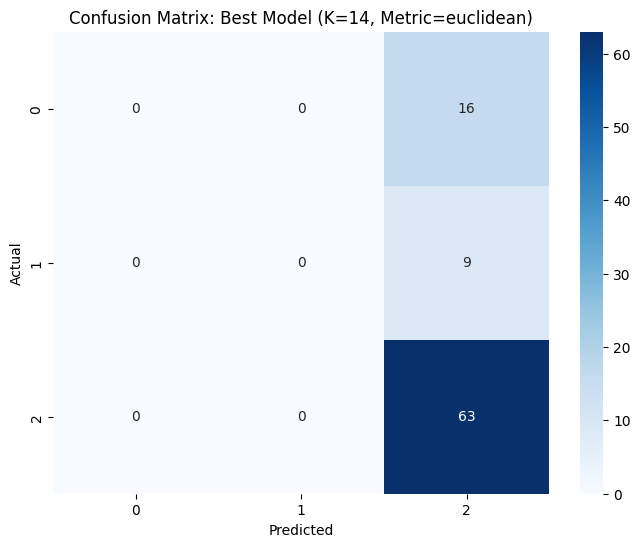

Cross-validation scores: [0.72727273 0.72727273 0.68181818 0.72727273 0.72727273 0.72727273
 0.70454545 0.70454545 0.70454545 0.70454545]
Mean cross-validation score: 0.7136363636363636


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_excel('/content/Wholesale-customers-data (1).xlsx')

# Preprocessing
X = df.drop("Region", axis=1)
y = df["Region"]

# Check the distribution of the target variable
print("Distribution of target variable:")
print(y.value_counts())

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Hyperparameter tuning using GridSearchCV
param_grid = {'n_neighbors': np.arange(1, 31), 'metric': ['euclidean', 'manhattan']}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid.fit(X_train, y_train)
best_k = grid.best_params_['n_neighbors']
best_metric = grid.best_params_['metric']
print("Best parameters found: K =", best_k, ", Metric =", best_metric)

# Best Model based on GridSearchCV
best_model = KNeighborsClassifier(n_neighbors=best_k, metric=best_metric)
best_model.fit(X_train, y_train)
y_pred_best = best_model.predict(X_test)

# Evaluation
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)
accuracy_best = accuracy_score(y_test, y_pred_best)
conf_matrix_best = confusion_matrix(y_test, y_pred_best)
class_report_best = classification_report(y_test, y_pred_best, output_dict=True, zero_division=1)

print(f"Best Model MSE: {mse_best}")
print(f"Best Model R-squared: {r2_best}")
print(f"Best Model Accuracy: {accuracy_best}")

# Confusion matrix visualization
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_best, annot=True, fmt="d", cmap="Blues")
plt.title(f"Confusion Matrix: Best Model (K={best_k}, Metric={best_metric})")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Cross-validation for more robust evaluation
cv_scores = cross_val_score(best_model, X, y, cv=10)
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation score: {np.mean(cv_scores)}")


**Hasil Model Terbaik** <br />
(KNN dengan K dan Metric Terbaik) <br />

berikut hasil dari MSE dan R-Squared dari beberapa nilai K yang di coba (3, 5, 7, 14) : <br />

*   K = 3 <br />
    Mean Squared Error(Y1) = 1.0454545454545454   <br />
    R-squared(Y1) = -1.629425138031828   <br />
    Akurasi = 67 % <br />
*   K = 5 <br />
    Mean Squared Error(Y1) = 0.8636363636363636  <br />
    R-squared(Y1) = -1.172133809678467   <br />
    Akurasi = 71 % <br />
*   K = 7 <br />
    Mean Squared Error(Y1) = 0.7045454545454546 <br />
    R-squared(Y1) = -0.7720038973692755   <br />
    Akurasi = 77 % <br />
*   K = 14 <br />
    Mean Squared Error(Y1) = 0.82954  <br />
    R-squared(Y1) = -0.3544170356314569    <br />
    Akurasi = 71.59% <br />
    Cross-validation score: 0.7136 (Mean cross-validation score menunjukkan stabilitas model terhadap variasi dataset).

**Confusion Matrix** <br />
Confusion matrix untuk model terbaik akan menunjukkan distribusi prediksi vs aktual yang memungkinkan kita untuk mengidentifikasi kelas mana yang memiliki kesalahan prediksi tertinggi.

#### Kesimpulan


 Performansi model dilihat dari banyaknya variasi nilai k yang terdiri dari k =3, k = 5, k = 7, dan k = 14. Nilai K yang memberikan hasil terbaik dalam hal akurasi dan performa keseluruhan adalah K = 7. Pada K = 7, model memiliki Mean Squared Error terendah dan akurasi tertinggi dibandingkan dengan nilai K lainnya yang diuji. Meskipun R-squared masih negatif, nilainya mendekati nol, menunjukkan bahwa model KNN dengan K = 7 memiliki potensi terbaik dalam memprediksi target dengan data yang tersedia.

